# Comparison of QAOA CVaR (Max Cut)
In this notebook the QAOA method using the Conditional Value at risk (CVaR) is compared to the stadard QAOA for a max cut problem. 

In [1]:
from qaoa import QAOA, problems, mixers, initialstates

In [2]:
import numpy as np
import networkx as nx
import sys                     
sys.path.append('../')         
from plotroutines import *

Create Barabási–Albert graph instance, more examples can be found here https://github.com/OpenQuantumComputing/data

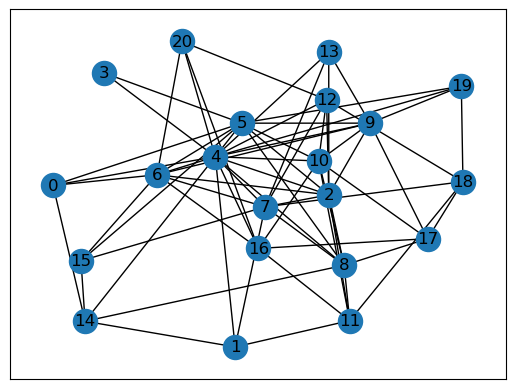

In [3]:
G = nx.read_gml("data/w_ba_n21_k4_0.gml")
nx.draw_networkx(G)
mincost = -25.23404480588015 # precalculated

Create QAOA instances with uniform superposition and X mixer. CVaR uses $\alpha=0.1$, i.e., only 10% best results

In [4]:
qaoa_CVaR = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X(),
    alpha=0.1,
)
qaoa = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X()
)

run optimization until given max depth

In [5]:
maxdepth=5
qaoa.optimize(depth=maxdepth)
qaoa_CVaR.optimize(depth=maxdepth)

2023-09-22 21:52:15 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
1 0
2023-09-22 21:52:15 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2023-09-22 21:52:15 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2023-09-22 21:52:15 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2023-09-22 21:57:13 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2023-09-22 21:57:13 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape
2023-09-22 21:57:36 [info     ] cost(depth 1 = -19.73250280341336 file=qaoa.qaoa func=optimize
2023-09-22 21:58:48 [info     ] cost(depth 2 = -21.270575179431997 file=qaoa.qaoa func=optimize
2023-09-22 22:01:15 [info     ] cost(depth 3 = -22.212600907536682 file=qaoa.qaoa func=optimize
2023-09-22 22:04:11 [info     ] cost(depth 4 = -22.570226204

plot energy landscapes at depth $p=1$

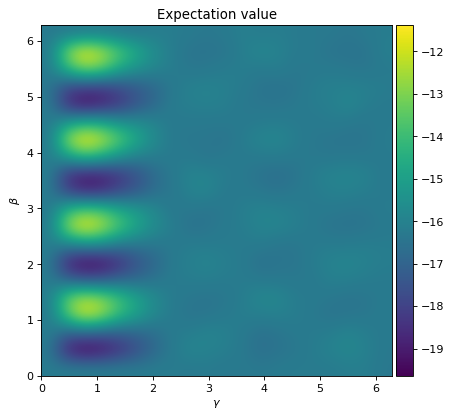

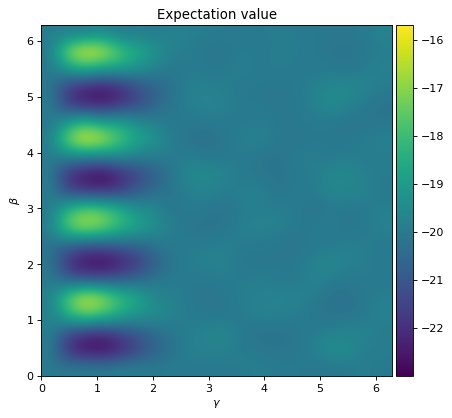

In [6]:
plot_E(qaoa)
plot_E(qaoa_CVaR)

plot approximation ratio

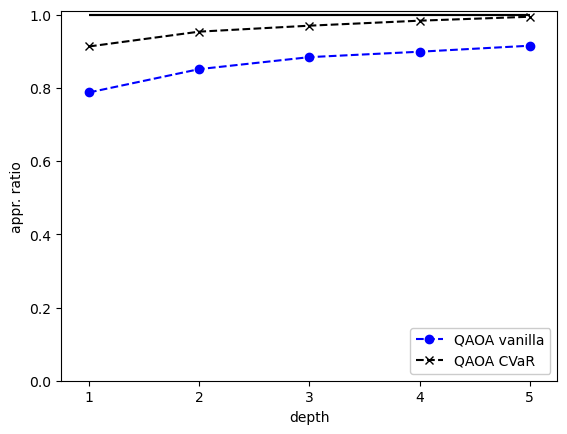

In [7]:
fig=pl.figure()
plot_Exp(qaoa, maxdepth, mincost=mincost, maxcost=0, label="QAOA vanilla", style="o--b",fig=fig)
plot_Exp(qaoa_CVaR, maxdepth, mincost=mincost, maxcost=0, label="QAOA CVaR", style="x--k",fig=fig)

plot how the expectation value changes during optimization

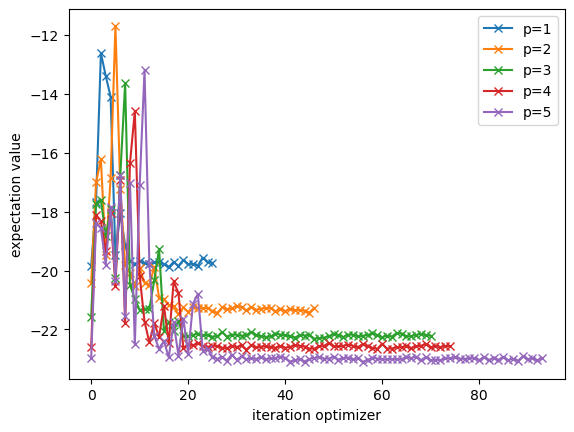

In [8]:
for i in range(maxdepth):
    pl.plot(qaoa.optimization_results[i+1].Exp,"x-", label="p="+str(i+1))
_=pl.legend()
_=pl.ylabel("expectation value")
_=pl.xlabel("iteration optimizer")